In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
import os
import sklearn.ensemble
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
os.getcwd()

'C:\\Users\\anhpnt\\Machine Learning'

In [4]:
#Data Pre processing

In [5]:
adult_df = pd.read_csv('adult21.csv')

In [6]:
adult_df.head()

,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,4,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,5423.324,H056808,1.93
1,4,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3832.196,H018779,4.45
2,4,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3422.661,H049265,5.94
3,3,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,12960.165,H007699,3.70
4,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,9284.618,H066034,1.66


In [7]:
adult_df.columns

Index(['URBRRL', 'RATCAT_A', 'IMPINCFLG_A', 'CVDVAC2YR_A', 'CVDVAC2MR_A',
       'CVDVAC1YR_A', 'CVDVAC1MR_A', 'SHTCVD19AV_A', 'SHTCVD19NM_A',
       'SHTCVD19_A',
       ...
       'PROXYREL_A', 'PROXY_A', 'AVAIL_A', 'HHSTAT_A', 'INTV_MON', 'RECTYPE',
       'IMPNUM_A', 'WTFA_A', 'HHX', 'POVRATTC_A'],
      dtype='object', length=622)

In [8]:
need_cols = ['ANXEV_A',
'DEPEV_A',
'ANXFREQ_A',
'ANXLEVEL_A',
'DEPFREQ_A',
'DEPLEVEL_A',
'AGEP_A',
'SEX_A',
'ORIENT_A',
'MARITAL_A',
'AFVET_A',
'CITZNSTP_A',
'SCHCURENR_A',
'EMPWRKLSW1_A',
'INCWRKO_A',
'INCINTER_A',
'RATCAT_A',
'NOTCOV_A',
'BMICAT_A',
'URBRRL',
'EDUCP_A',
]

In [9]:
subset_df = adult_df[need_cols]

In [10]:
subset_df.columns

Index(['ANXEV_A', 'DEPEV_A', 'ANXFREQ_A', 'ANXLEVEL_A', 'DEPFREQ_A',
       'DEPLEVEL_A', 'AGEP_A', 'SEX_A', 'ORIENT_A', 'MARITAL_A', 'AFVET_A',
       'CITZNSTP_A', 'SCHCURENR_A', 'EMPWRKLSW1_A', 'INCWRKO_A', 'INCINTER_A',
       'RATCAT_A', 'NOTCOV_A', 'BMICAT_A', 'URBRRL', 'EDUCP_A'],
      dtype='object')

In [11]:
subset_df.columns = ['anx_ever', 'dep_ever', 'anx_freq', 'anx_level', 'dep_freq', 'dep_level',
                     'age','sex', 'orient', 'marital','veteran_ever',
                     'citizenship','school_current','employ_last_week','income_wage','income_account',
                     'ratio_fam_income_pov','ins_cov','bmi','urbanrural','education']

In [12]:
column_map = dict(zip(subset_df.columns, need_cols))

In [13]:
subset_df.isna().any()

anx_ever                False
dep_ever                False
anx_freq                False
anx_level                True
dep_freq                False
dep_level                True
age                     False
sex                     False
orient                  False
marital                 False
veteran_ever            False
citizenship             False
school_current          False
employ_last_week        False
income_wage             False
income_account          False
ratio_fam_income_pov    False
ins_cov                 False
bmi                     False
urbanrural              False
education               False
dtype: bool

In [14]:
#Column anx_level (anxiety level) and dep_level (depression level) has NaN values. Replace them with 0

In [15]:
import math
subset_df.loc[:, 'anx_level'] = subset_df.loc[:, 'anx_level'].apply(lambda x : 0 if math.isnan(x) else x)

In [16]:
subset_df.loc[:, 'dep_level'] = subset_df.loc[:, 'dep_level'].apply(lambda x : 0 if math.isnan(x) else x)

In [17]:
subset_df['anx_level'].value_counts()

anx_level
1.0    10301
0.0     8858
3.0     7893
2.0     2264
9.0       91
7.0       64
8.0       11
Name: count, dtype: int64

In [18]:
subset_df['dep_level'].value_counts()

dep_level
0.0    15478
1.0     7031
3.0     5051
2.0     1765
9.0       89
7.0       68
Name: count, dtype: int64

In [19]:
subset_df = subset_df[(subset_df['anx_level'] < 7.0) & (subset_df['dep_level'] < 7.0)]
# less than 1% of the sample is removed.

In [20]:
column_map

{'anx_ever': 'ANXEV_A',
 'dep_ever': 'DEPEV_A',
 'anx_freq': 'ANXFREQ_A',
 'anx_level': 'ANXLEVEL_A',
 'dep_freq': 'DEPFREQ_A',
 'dep_level': 'DEPLEVEL_A',
 'age': 'AGEP_A',
 'sex': 'SEX_A',
 'orient': 'ORIENT_A',
 'marital': 'MARITAL_A',
 'veteran_ever': 'AFVET_A',
 'citizenship': 'CITZNSTP_A',
 'school_current': 'SCHCURENR_A',
 'employ_last_week': 'EMPWRKLSW1_A',
 'income_wage': 'INCWRKO_A',
 'income_account': 'INCINTER_A',
 'ratio_fam_income_pov': 'RATCAT_A',
 'ins_cov': 'NOTCOV_A',
 'bmi': 'BMICAT_A',
 'urbanrural': 'URBRRL',
 'education': 'EDUCP_A'}

In [21]:
#Doing the same thing for the remaining columns that contains "don't know" answers.

In [22]:
subset_df = subset_df[(subset_df['sex'] <= 2) & (subset_df['education'] <= 11) & 
          (subset_df['age'] <= 85) & (subset_df['anx_ever'] <= 2) & (subset_df['dep_ever'] <= 2) & 
          (subset_df['ins_cov'] <= 2) & (subset_df['orient'] <= 4) & (subset_df['marital'] <= 3) &
          (subset_df['veteran_ever'] <= 2) & (subset_df['citizenship'] <= 2) & (subset_df['bmi'] <= 4)]

In [23]:
subset_df.head()

,anx_ever,dep_ever,anx_freq,anx_level,dep_freq,dep_level,age,sex,orient,marital,...,citizenship,school_current,employ_last_week,income_wage,income_account,ratio_fam_income_pov,ins_cov,bmi,urbanrural,education
0,2,2,5,0.0,5,0.0,50,1,2,3,...,1,2,1,1,2,7,2,3,4,1
1,2,2,4,3.0,5,0.0,53,1,2,3,...,1,2,1,1,2,12,2,3,4,7
2,1,2,2,3.0,4,1.0,56,1,2,3,...,1,2,1,1,2,14,2,3,4,8
3,1,2,2,3.0,4,3.0,57,2,2,3,...,1,2,2,1,2,11,2,4,3,5
7,2,2,5,0.0,5,0.0,41,1,2,1,...,1,2,1,1,2,14,2,3,1,5


In [24]:
subset_df = subset_df.reset_index(drop=True)

In [25]:
subset_df.head()

,anx_ever,dep_ever,anx_freq,anx_level,dep_freq,dep_level,age,sex,orient,marital,...,citizenship,school_current,employ_last_week,income_wage,income_account,ratio_fam_income_pov,ins_cov,bmi,urbanrural,education
0,2,2,5,0.0,5,0.0,50,1,2,3,...,1,2,1,1,2,7,2,3,4,1
1,2,2,4,3.0,5,0.0,53,1,2,3,...,1,2,1,1,2,12,2,3,4,7
2,1,2,2,3.0,4,1.0,56,1,2,3,...,1,2,1,1,2,14,2,3,4,8
3,1,2,2,3.0,4,3.0,57,2,2,3,...,1,2,2,1,2,11,2,4,3,5
4,2,2,5,0.0,5,0.0,41,1,2,1,...,1,2,1,1,2,14,2,3,1,5


In [26]:
subset_df.isna().any()

anx_ever                False
dep_ever                False
anx_freq                False
anx_level               False
dep_freq                False
dep_level               False
age                     False
sex                     False
orient                  False
marital                 False
veteran_ever            False
citizenship             False
school_current          False
employ_last_week        False
income_wage             False
income_account          False
ratio_fam_income_pov    False
ins_cov                 False
bmi                     False
urbanrural              False
education               False
dtype: bool

In [27]:
#Since there are many different categories in the education column, we reduce the coding to three main categories: 1 encodes for people without a college degree(high school or below), 2 indicates a college degree or equivalent, 3 stands for a professional degree (Master's, PhD, MD, JD..). The first, second, and third categories take up roughly 55%, 35%, and 10% of the entire data, which looks intuitive to us based on experience.

In [28]:
def map_edu(x):
    if x in {0, 1, 2, 3, 4, 5}:
        return 1
    elif x in {6, 7, 8}:
        return 2
    return 3

In [29]:
subset_df['education'] = subset_df['education'].apply(map_edu)

In [30]:
subset_df['anx_ever'].value_counts()

anx_ever
2    22467
1     4458
Name: count, dtype: int64

In [31]:
subset_df['anx_ever'] = subset_df['anx_ever'].apply(lambda x : 0 if (x == 2) else x)

In [32]:
subset_df['anx_ever'].value_counts()

anx_ever
0    22467
1     4458
Name: count, dtype: int64

In [33]:
subset_df['dep_ever'] = subset_df['dep_ever'].apply(lambda x : 0 if (x == 2) else x)

In [34]:
subset_df['dep_ever'].value_counts()

dep_ever
0    21982
1     4943
Name: count, dtype: int64

In [35]:
subset_df['anx_level'].value_counts()

anx_level
1.0    9726
0.0    7689
3.0    7416
2.0    2094
Name: count, dtype: int64

In [36]:
subset_df['anx_level'] = subset_df['anx_level'].apply(lambda x : 1.5 if (x == 3) else x)

In [37]:
subset_df['dep_level'] = subset_df['dep_level'].apply(lambda x : 1.5 if (x == 3) else x)

In [38]:
subset_df['anx_level'].value_counts()

anx_level
1.0    9726
0.0    7689
1.5    7416
2.0    2094
Name: count, dtype: int64

In [39]:
subset_df = subset_df.replace({"anx_freq": {5: 0}, "dep_freq": {5: 0}})

In [40]:
subset_df['anx_freq'].value_counts()

anx_freq
4    8579
0    7813
2    3919
1    3326
3    3250
9      36
7       2
Name: count, dtype: int64

In [41]:
# create a dictionary mapping the old values to new values
replace_dict = {4: 1, 3: 2, 2: 3, 1: 4}
# replace the values in the 'anx_freq' column using the dictionary
subset_df['anx_freq'] = subset_df['anx_freq'].replace(replace_dict)

In [42]:
subset_df['anx_freq'].value_counts()

anx_freq
1    8579
0    7813
3    3919
4    3326
2    3250
9      36
7       2
Name: count, dtype: int64

In [43]:
subset_df['dep_freq'].value_counts()

dep_freq
0    14141
4     7895
3     2107
2     1662
1     1084
9       35
7        1
Name: count, dtype: int64

In [44]:
# replace the values in the 'anx_freq' column using the dictionary
subset_df['dep_freq'] = subset_df['dep_freq'].replace(replace_dict)

In [45]:
subset_df['dep_freq'].value_counts()

dep_freq
0    14141
1     7895
2     2107
3     1662
4     1084
9       35
7        1
Name: count, dtype: int64

In [46]:
subset_df.head()

,anx_ever,dep_ever,anx_freq,anx_level,dep_freq,dep_level,age,sex,orient,marital,...,citizenship,school_current,employ_last_week,income_wage,income_account,ratio_fam_income_pov,ins_cov,bmi,urbanrural,education
0,0,0,0,0.0,0,0.0,50,1,2,3,...,1,2,1,1,2,7,2,3,4,1
1,0,0,1,1.5,0,0.0,53,1,2,3,...,1,2,1,1,2,12,2,3,4,2
2,1,0,3,1.5,1,1.0,56,1,2,3,...,1,2,1,1,2,14,2,3,4,2
3,1,0,3,1.5,1,1.5,57,2,2,3,...,1,2,2,1,2,11,2,4,3,1
4,0,0,0,0.0,0,0.0,41,1,2,1,...,1,2,1,1,2,14,2,3,1,1


### Creating the score column


## score = anx_level  x anx_freq +dep_level x dep_freq



In [47]:
def mh_score(row):
    return row['anx_level'] * row['anx_freq'] + row['dep_level'] * row['dep_freq']

In [48]:
subset_df['score'] = subset_df.apply(mh_score, axis=1)

In [49]:
subset_df.head()

,anx_ever,dep_ever,anx_freq,anx_level,dep_freq,dep_level,age,sex,orient,marital,...,school_current,employ_last_week,income_wage,income_account,ratio_fam_income_pov,ins_cov,bmi,urbanrural,education,score
0,0,0,0,0.0,0,0.0,50,1,2,3,...,2,1,1,2,7,2,3,4,1,0.0
1,0,0,1,1.5,0,0.0,53,1,2,3,...,2,1,1,2,12,2,3,4,2,1.5
2,1,0,3,1.5,1,1.0,56,1,2,3,...,2,1,1,2,14,2,3,4,2,5.5
3,1,0,3,1.5,1,1.5,57,2,2,3,...,2,2,1,2,11,2,4,3,1,6.0
4,0,0,0,0.0,0,0.0,41,1,2,1,...,2,1,1,2,14,2,3,1,1,0.0


Text(0.5, 1.0, 'Frequency Distribution of Mental Health Score')

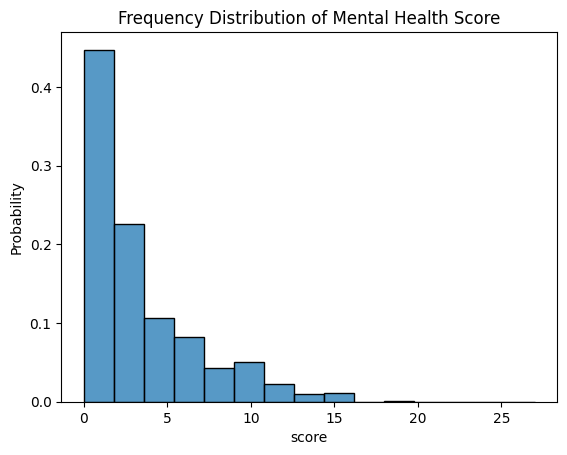

In [50]:
sns.histplot(data=subset_df, x='score', stat="probability", bins=15)
plt.title("Frequency Distribution of Mental Health Score")

In [51]:
#Since the score column is skewed, we use sklearn's standard scaler to normalize it and store in another column

In [52]:
# create new column using standard scaler
subset_df['norm_score'] = sklearn.preprocessing.StandardScaler().fit_transform(subset_df['score'].to_numpy().reshape(-1,1))

Text(0.5, 1.0, 'Frequency Distribution of Normalized Mental Health Score')

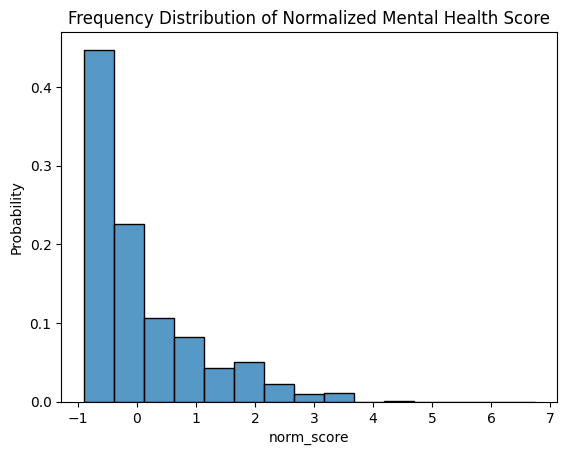

In [53]:
sns.histplot(data=subset_df, x='norm_score', stat="probability", bins=15)
plt.title("Frequency Distribution of Normalized Mental Health Score")

In [54]:
#We also create a binary variable indicating that if a sample has > 0 mental health score, so that we can frame our problem as both regression and classfication problem.

In [55]:
subset_df['mh_ever'] = subset_df['score'].apply(lambda x : x > 0)

Text(0.5, 1.0, 'Ever Had Mental Health Issues')

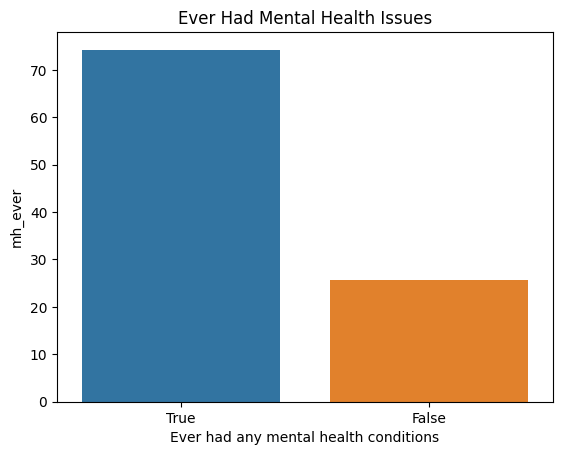

In [56]:
sns.barplot(x="mh_ever", y="mh_ever", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100, order=[True, False])
plt.xlabel('Ever had any mental health conditions')
plt.title('Ever Had Mental Health Issues')

In [57]:
subset_df.head()

,anx_ever,dep_ever,anx_freq,anx_level,dep_freq,dep_level,age,sex,orient,marital,...,income_wage,income_account,ratio_fam_income_pov,ins_cov,bmi,urbanrural,education,score,norm_score,mh_ever
0,0,0,0,0.0,0,0.0,50,1,2,3,...,1,2,7,2,3,4,1,0.0,-0.895675,False
1,0,0,1,1.5,0,0.0,53,1,2,3,...,1,2,12,2,3,4,2,1.5,-0.471833,True
2,1,0,3,1.5,1,1.0,56,1,2,3,...,1,2,14,2,3,4,2,5.5,0.658412,True
3,1,0,3,1.5,1,1.5,57,2,2,3,...,1,2,11,2,4,3,1,6.0,0.799693,True
4,0,0,0,0.0,0,0.0,41,1,2,1,...,1,2,14,2,3,1,1,0.0,-0.895675,False


In [58]:
#Score

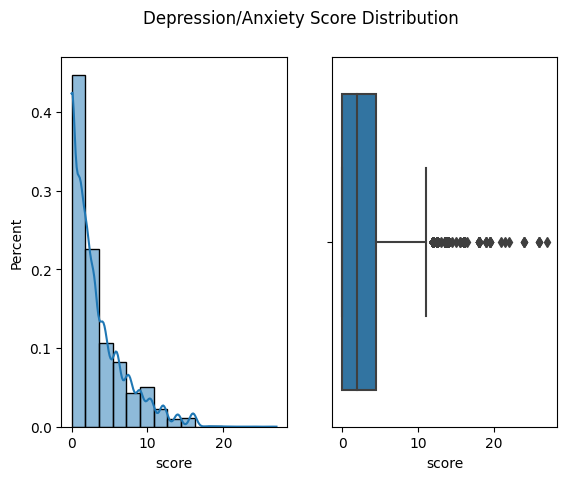

In [59]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=subset_df, x='score', bins=15, kde=True, ax = axes[0], stat="probability").set_ylabel('Percent')
plt.suptitle('Depression/Anxiety Score Distribution')
sns.boxplot(data=subset_df, x='score', ax = axes[1])
fig.show()

In [60]:
def get_outliers(col):
    IQR = col.quantile(q=0.75) - col.quantile(q=0.25)
    return col[np.abs(col - col.mean()) > 1.5 * IQR]

In [61]:
get_outliers(subset_df['score'])

12       12.5
28       10.5
39       12.0
53       14.0
69       14.0
         ... 
26891    14.0
26893    12.5
26909    12.0
26922    10.0
26924    14.0
Name: score, Length: 1849, dtype: float64

In [62]:
subset_df['score'].std()

3.5391212586611758

In [63]:
#Age

Check it later: subset_df['age'] = subset_df['age'].apply(lambda x : x > 0)

Text(0.5, 1.0, 'Age Distribution')

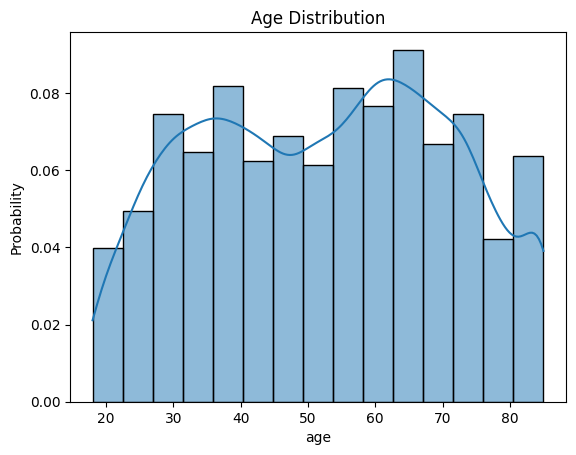

In [64]:
ax = sns.histplot(x = 'age', data = subset_df, stat="probability", bins = 15, kde=True)
ax.set_title('Age Distribution')

In [65]:
get_outliers(subset_df['age'])

Series([], Name: age, dtype: int64)

Text(0.5, 1.0, 'Urban/Rural Breakdown')

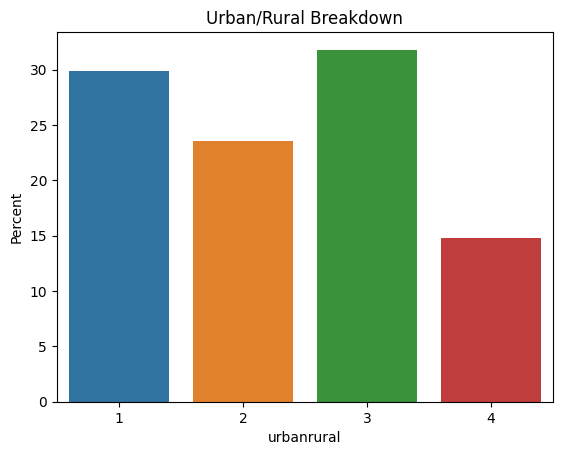

In [66]:
ax = sns.barplot(x="urbanrural", y="urbanrural", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax.set(ylabel="Percent")
ax.set_title('Urban/Rural Breakdown')

Gender
Type: Categorical
Description: Sex of survey participants
Encoding
1 --> Male
2 --> Female

Text(0.5, 1.0, 'Gender Breakdown')

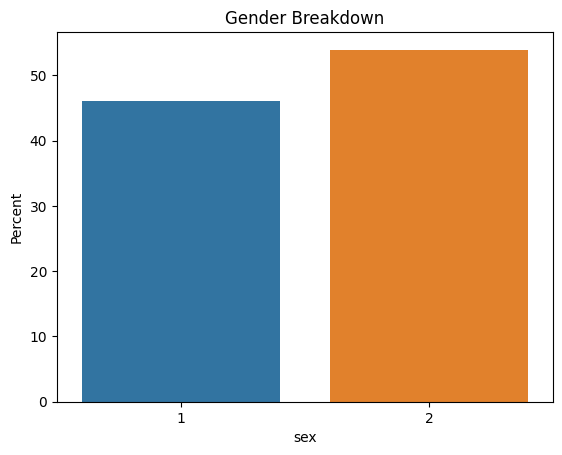

In [67]:
ax = sns.barplot(x="sex", y="sex", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax.set(ylabel="Percent")
ax.set_title('Gender Breakdown')

Education Level
Type: Categorical
Description: Education level of survey participant
Encoding
1 --> No college degree
2 --> Bachelor's degree
3 --> Professional degree (masters, Ph.D., or equivalent)

Text(0.5, 1.0, 'Education Level Breakdown')

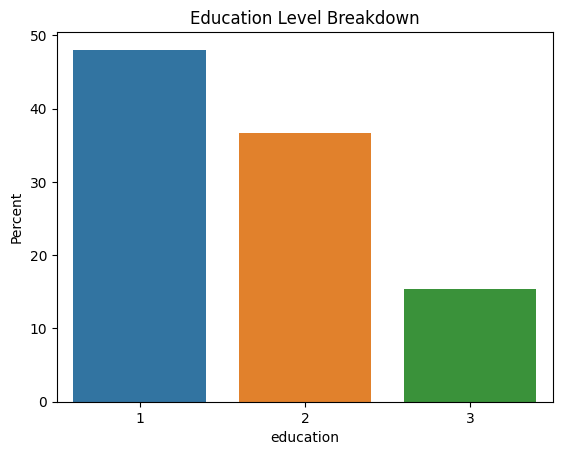

In [68]:
ax = sns.barplot(x="education", y="education", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax.set(ylabel="Percent")
ax.set_title('Education Level Breakdown')

Anxiety Level and Depression Level
Type: Categorical
Descrption: Self-reported anxiety / depression level
Encoding
0 ---> no anxiety reported
1 ---> "A little"
2 ---> "Between a little and a lot"
3 ---> "A lot"

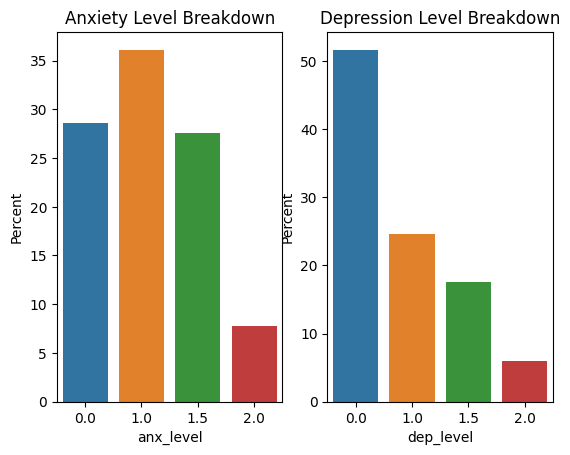

In [69]:
fig, axes =plt.subplots(1,2)
sns.barplot(x="anx_level", y="anx_level", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100, ax = axes[0]).set(ylabel="Percent")
axes[0].set_title('Anxiety Level Breakdown')
sns.barplot(x="dep_level", y="dep_level", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100, ax = axes[1]).set(ylabel="Percent")
axes[1].set_title('Depression Level Breakdown')
fig.show()

Anxiety Frequency and Depression Frequency
Type: Categorical
Description: Response to survey question: How often do you feel anxiety / depressed? Would you say daily, weekly, monthly, a few
times a year, or never?

Encoding
0 ---> never
1 ---> A few times a year
2 ---> Monthly
3 ---> Weekly
4 ---> Daily

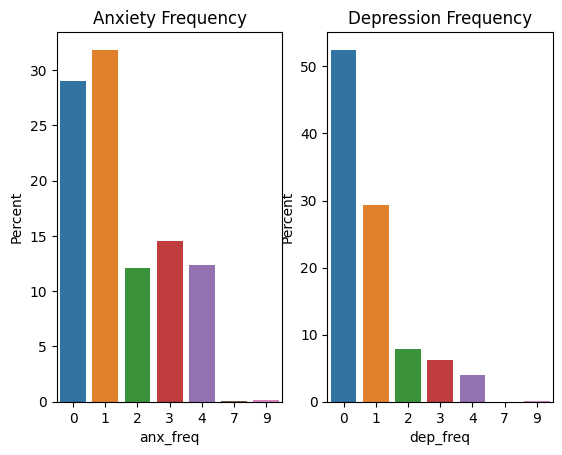

In [70]:
fig, axes =plt.subplots(1,2)
sns.barplot(x="anx_freq", y="anx_freq", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100, ax = axes[0]).set(ylabel="Percent")
axes[0].set_title('Anxiety Frequency')
sns.barplot(x="dep_freq", y="dep_freq", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100, ax = axes[1]).set(ylabel="Percent")
axes[1].set_title('Depression Frequency')
fig.show()

Insurance Coverage
Type: Categorical
Descrption: Medical insurance coverage status
Encoding
1 ---> not covered
2 ---> covered

Text(0.5, 1.0, 'Medical Insurance Coverage')

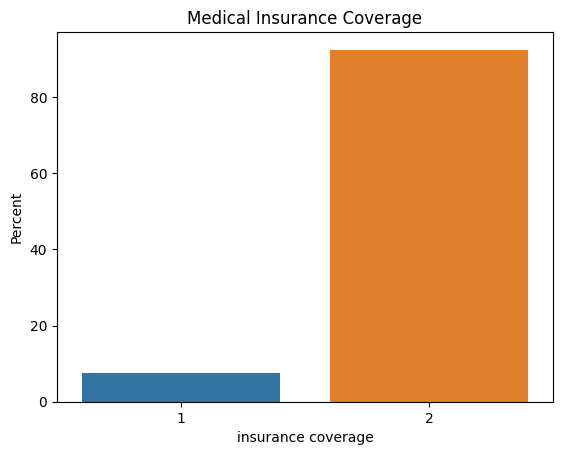

In [71]:
ax_ins = sns.barplot(x="ins_cov", y="ins_cov", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax_ins.set(ylabel="Percent", xlabel = 'insurance coverage')
ax_ins.set_title('Medical Insurance Coverage')

Text(0.5, 1.0, 'Sexual Orientation Breakdown')

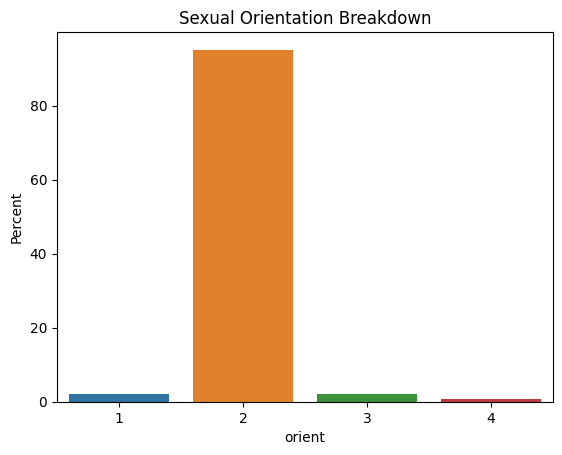

In [72]:
ax = sns.barplot(x="orient", y="orient", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax.set(ylabel="Percent")
ax.set_title('Sexual Orientation Breakdown')

Marital
Type: Categorical
Description: Marital status
Encoding
1 ---> married
2 ---> living with partner together as unmarried couple
3 ---> Neither

Text(0.5, 1.0, 'Marital Status Breakdown')

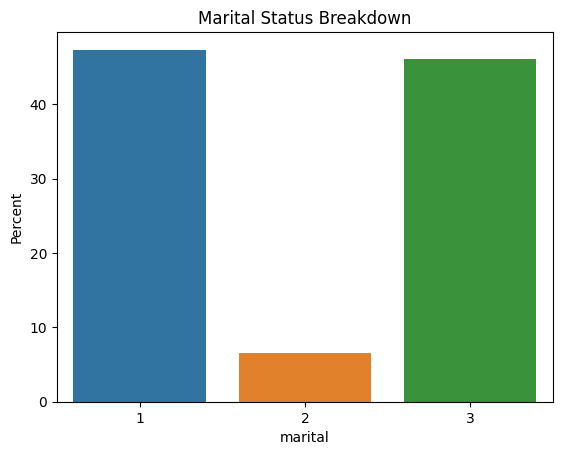

In [73]:
ax_marital = sns.barplot(x="marital", y="marital", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax_marital.set(ylabel="Percent")
ax_marital.set_title('Marital Status Breakdown')

income
Type: Categorical
Description: family income of sample adult
Encoding
1->Yes (Income from wages)
2->No (No Income from wages)
7->Refused
8->Not Ascertained 
9->Don't Know

Text(0.5, 1.0, 'Household Income Breakdown')

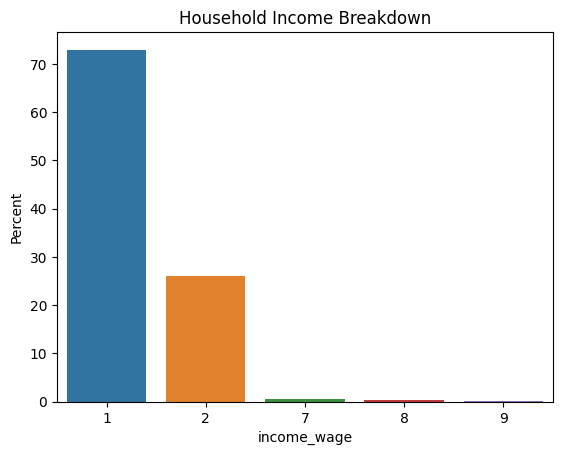

In [74]:
ax_income = sns.barplot(x="income_wage", y="income_wage", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax_income.set(ylabel="Percent")
ax_income.set_title('Household Income Breakdown')

bmi
Type: Categorical
Description: Categorical body mass index
Encoding
1->Underweight
2->Healthy weight
3->Overweight
4->Obese

Text(0.5, 1.0, 'BMI Breakdown')

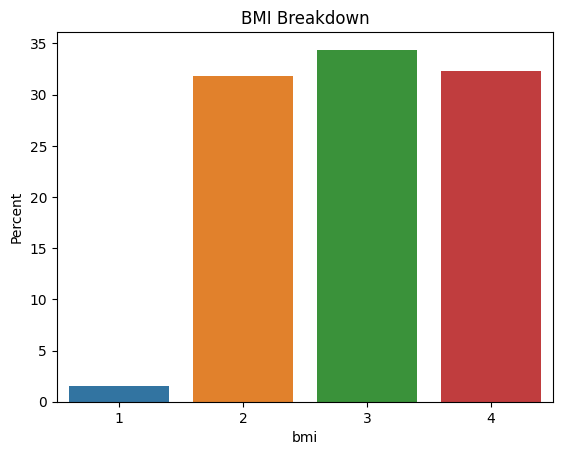

In [75]:
ax_bmi = sns.barplot(x="bmi", y="bmi", data=subset_df, estimator=lambda x: len(x) / len(subset_df) * 100)
ax_bmi.set(ylabel="Percent")
ax_bmi.set_title('BMI Breakdown')

Potential association between variables

In [76]:
subset_df.corr()['income_wage']

anx_ever                0.004486
dep_ever                0.019436
anx_freq               -0.051848
anx_level              -0.054898
dep_freq                0.009048
dep_level              -0.011962
age                     0.293265
sex                     0.034534
orient                 -0.006348
marital                 0.094821
veteran_ever           -0.073405
citizenship            -0.040934
school_current          0.118714
employ_last_week        0.396540
income_wage             1.000000
income_account          0.368781
ratio_fam_income_pov   -0.156588
ins_cov                 0.037388
bmi                    -0.007768
urbanrural              0.036362
education              -0.073517
score                  -0.020402
norm_score             -0.020402
mh_ever                -0.057923
Name: income_wage, dtype: float64

In [77]:
income_edu = subset_df[['income_wage', 'education']].copy()
income_edu.corr()

,income_wage,education
income_wage,1.000000,-0.073517
education,-0.073517,1.000000


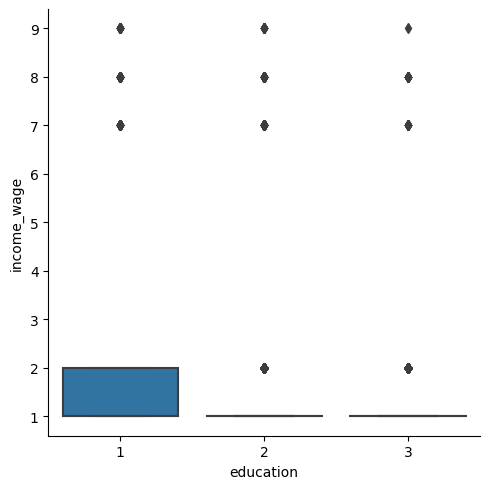

In [78]:
sns.catplot(x="education", y="income_wage", kind="box", data=subset_df)

In [79]:
income_sex = subset_df[['income_wage', 'sex']].copy()
income_sex.corr()

,income_wage,sex
income_wage,1.000000,0.034534
sex,0.034534,1.000000


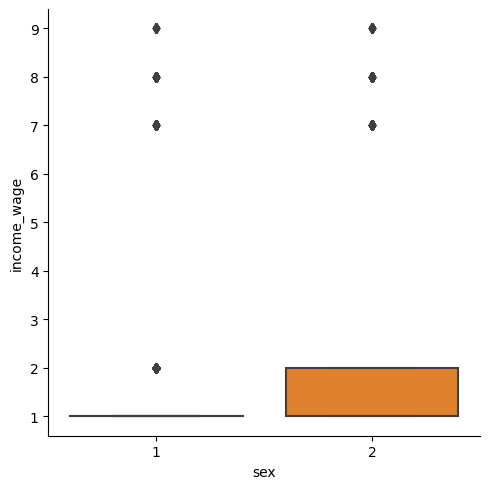

In [80]:
sns.catplot(x="sex", y="income_wage", kind="box", data=subset_df)

In [81]:
#Association between insurance coverage and income
income_ins = subset_df[['income_wage', 'ins_cov']].copy()
income_ins.corr()

,income_wage,ins_cov
income_wage,1.000000,0.037388
ins_cov,0.037388,1.000000


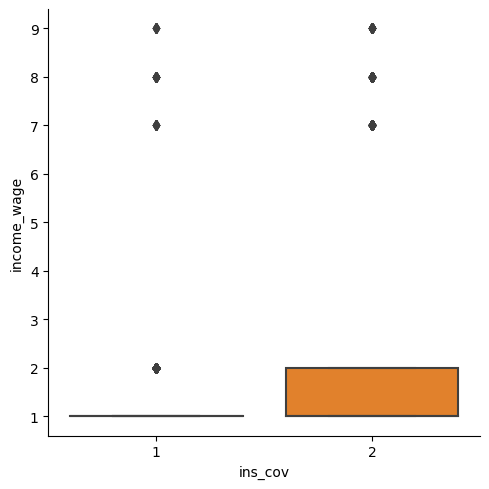

In [82]:
sns.catplot(x="ins_cov", y="income_wage", kind="box", data=subset_df)

In [83]:
subset_df.corr()['score']

anx_ever                0.490700
dep_ever                0.533779
anx_freq                0.852267
anx_level               0.699911
dep_freq                0.845750
dep_level               0.728129
age                    -0.150625
sex                     0.126745
orient                  0.090353
marital                 0.102682
veteran_ever            0.045063
citizenship            -0.064374
school_current         -0.056697
employ_last_week        0.021975
income_wage            -0.020402
income_account          0.009744
ratio_fam_income_pov   -0.116050
ins_cov                -0.002335
bmi                     0.009624
urbanrural              0.014808
education              -0.015267
score                   1.000000
norm_score              1.000000
mh_ever                 0.527503
Name: score, dtype: float64

In [84]:
#Association between income and score
income_score = subset_df[['income_wage', 'score']].copy()
income_score.corr()

,income_wage,score
income_wage,1.000000,-0.020402
score,-0.020402,1.000000


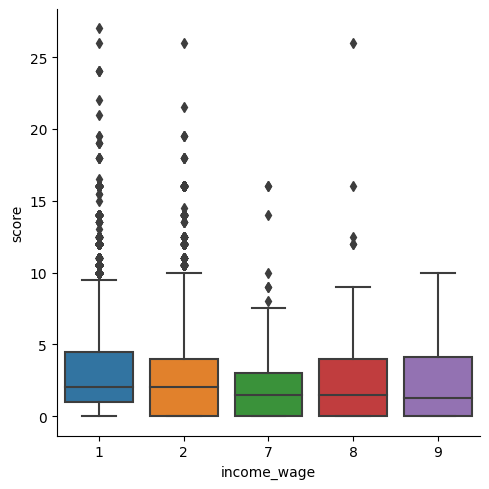

In [85]:
sns.catplot(x="income_wage", y="score", kind="box", data=subset_df)

Association between BMI and depression score

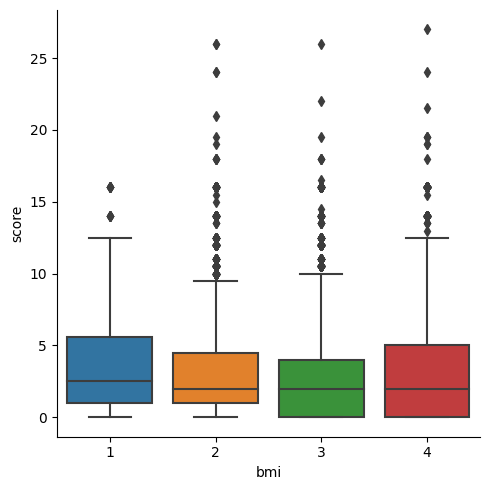

In [86]:
bmi_dep = subset_df[['bmi', 'score']].copy()
bmi_dep.corr()
sns.catplot(x="bmi", y="score", kind="box", data=subset_df)

Text(0.5, 1.0, 'Mental health score by gender')

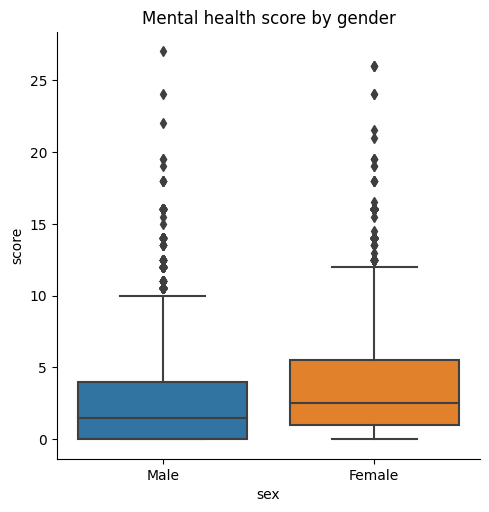

In [87]:
#Mental Health and Gender
male_mh_score = subset_df[subset_df['sex'] == 1]['score']
female_mh_score = subset_df[subset_df['sex'] == 2]['score']
sns.catplot(kind='box', x='sex',y='score',data=subset_df)
ax = plt.gca()
ax.set_xticklabels(labels=['Male','Female'])
plt.title('Mental health score by gender')


In [88]:
import statsmodels.api as sm
sm.stats.ttest_ind(male_mh_score, female_mh_score, alternative='smaller')

(-20.965618017522342, 4.018863157469958e-97, 26923.0)

Text(0.5, 1.0, 'Mental Health Score by Sexual Orientation')

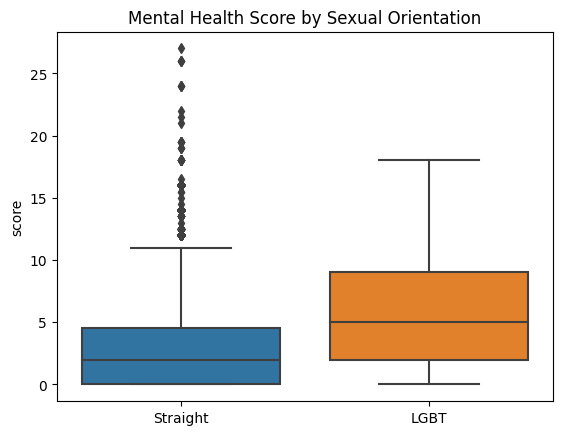

In [89]:
#Mental Health and Sexual Orientation
LGBT_score = subset_df[subset_df['orient'] != 2]['score']
non_LGBT_score = subset_df[subset_df['orient'] == 2]['score']
# create new binary variable based on LGBT or straight
subset_df['lgbt'] = subset_df['orient'].apply(lambda x : 1 if x != 2 else 0)
# graph new column against mental health score
sns.boxplot(x='lgbt', y='score', data=subset_df)
ax = plt.gca()
ax.set_xticklabels(['Straight', 'LGBT'])
ax.set_xlabel('')
plt.title("Mental Health Score by Sexual Orientation")

In [90]:
t, p, dof = sm.stats.ttest_ind(LGBT_score, non_LGBT_score, alternative='larger')
t, p

(27.06226915392172, 1.8492539891208625e-159)

Text(0.5, 1.0, 'Mental Health Score by Bodyweight')

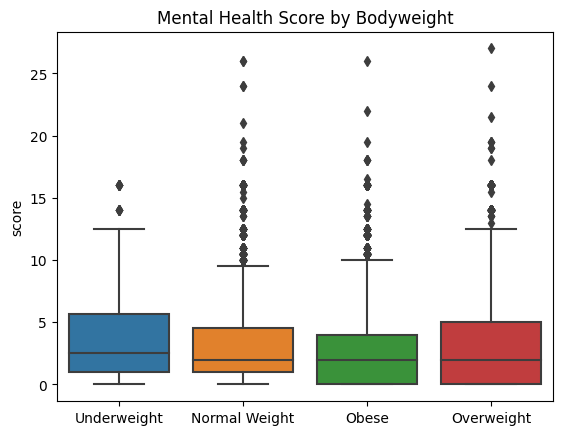

In [91]:
#Mental Health and BMI (body weight)
underweight_scores = subset_df[subset_df['bmi'] == 1]['score']
normal_scores = subset_df[(subset_df['bmi'] == 2)]['score']
overweight_scores = subset_df[(subset_df['bmi'] == 4)| (subset_df['bmi'] == 3)]['score']
sns.boxplot(x='bmi', y='score', data=subset_df)
ax = plt.gca()
ax.set_xticklabels(['Underweight', 'Normal Weight', 'Obese', 'Overweight'])
ax.set_xlabel('')
plt.title("Mental Health Score by Bodyweight")

In [92]:
import scipy
scipy.stats.f_oneway(overweight_scores, normal_scores, underweight_scores)


F_onewayResult(statistic=7.252827616949491, pvalue=0.0007095536867821467)

In [93]:
# perform Tukey's HSD. Here, group 1 is underweight, group 2 is considered normal bmi, group 3 and 4 are obese
# /overweight
print(pairwise_tukeyhsd(subset_df['score'], subset_df['bmi']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.472  0.039 -0.9277 -0.0162   True
     1      3  -0.8016    0.0 -1.2565 -0.3466   True
     1      4  -0.3333 0.2368 -0.7889  0.1223  False
     2      3  -0.3296    0.0 -0.4657 -0.1935   True
     2      4   0.1386  0.049  0.0004  0.2769   True
     3      4   0.4683    0.0  0.3327  0.6038   True
----------------------------------------------------


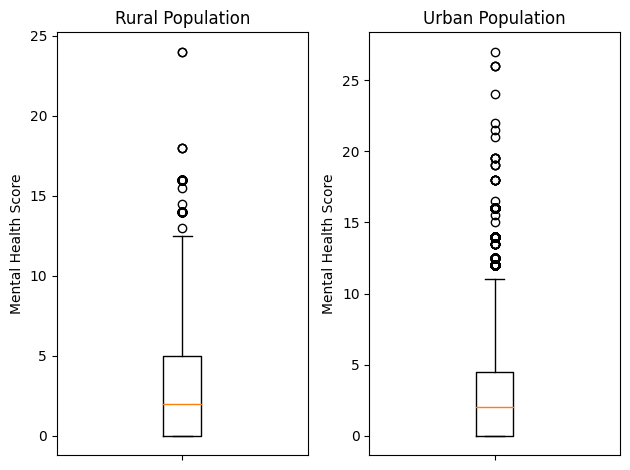

In [94]:
#Mental Health and Household 
subset_df['urban'] = subset_df['urbanrural'].apply(lambda x : x != 4)
rural_scores = subset_df[subset_df['urbanrural'] == 4]['score']
urban_scores = subset_df[subset_df['urbanrural'] != 4]['score']
# display mental health score between urban and rural populations
f, a = plt.subplots(1,2)
a = a.flatten()
a[0].boxplot(rural_scores)
a[0].set_xticklabels("")
a[0].set_title('Rural Population')
a[0].set_ylabel('Mental Health Score')
a[1].boxplot(urban_scores)
a[1].set_xticklabels("")
a[1].set_ylabel('Mental Health Score')
a[1].set_title('Urban Population')
plt.tight_layout()

In [95]:
t, p, dof = sm.stats.ttest_ind(rural_scores, urban_scores, alternative='larger')

t, p

(2.692276289611293, 0.003550500778989543)

In [96]:
#Mental Health and Income
# aggregate score by income groups, then conduct one way ANOVA
income_groups = subset_df.groupby('income_wage').agg(list)['score']

scipy.stats.f_oneway(*income_groups)
print(pairwise_tukeyhsd(subset_df['score'], subset_df['income_wage']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0798 0.4839 -0.2142 0.0545  False
     1      7  -0.8345 0.0672 -1.7041 0.0351  False
     1      8  -0.4474 0.6548 -1.3463 0.4515  False
     1      9  -0.7808 0.6771 -2.3911 0.8296  False
     2      7  -0.7547 0.1282 -1.6292 0.1198  False
     2      8  -0.3676 0.8015 -1.2712 0.5361  False
     2      9  -0.7009 0.7598 -2.3139  0.912  False
     7      8   0.3871 0.9159 -0.8598  1.634  False
     7      9   0.0538    1.0 -1.7738 1.8813  False
     8      9  -0.3333  0.988  -2.175 1.5083  False
---------------------------------------------------


### Machine Learning Models

### Linear Regression

In [97]:
# features in regression analysis
cols = ['age', 'income_wage', 'ins_cov', 'urban', 'sex', 'education','bmi','marital','orient','employ_last_week','income_account','ratio_fam_income_pov', 'veteran_ever']

# regressor candidates
regressors = [sklearn.linear_model.SGDRegressor(), sklearn.svm.SVR(), sklearn.ensemble.RandomForestRegressor()]

In [ ]:
#Hyperparameters are the settings or configurations of a machine learning model that are not 
#learned from the data itself but are set before training the model

In [98]:
# hyperparameters for regressors
params = [{'penalty':['l1','l2','elasticnet'], 'loss': ['huber','squared_loss'], 
          'alpha':[10e-4,10e-3,10e-2,1,10]}, 
         {'kernel': ['rbf','linear','sigmoid'], 'C': [10e-4,10e-3,10e-2,1,10]}, 
         {'criterion': ['mse', 'mae'], 'max_features':['auto','sqrt','log2'], 'min_samples_split': [2,4,6]}]

In [99]:
# Prepare for X and y
y = subset_df.score
X = subset_df[cols]

In [100]:
y

0         0.0
1         1.5
2         5.5
3         6.0
4         0.0
         ... 
26920     5.0
26921     7.5
26922    10.0
26923     7.0
26924    14.0
Name: score, Length: 26925, dtype: float64

In [101]:
X

,age,income_wage,ins_cov,urban,sex,education,bmi,marital,orient,employ_last_week,income_account,ratio_fam_income_pov,veteran_ever
0,50,1,2,False,1,1,3,3,2,1,2,7,2
1,53,1,2,False,1,2,3,3,2,1,2,12,2
2,56,1,2,False,1,2,3,3,2,1,2,14,1
3,57,1,2,True,2,1,4,3,2,2,2,11,2
4,41,1,2,True,1,1,3,1,2,1,2,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26920,70,2,2,False,2,3,3,1,2,2,1,14,2
26921,35,1,2,False,2,2,4,1,2,1,2,10,2
26922,72,2,2,False,2,1,3,1,2,2,1,8,2
26923,58,2,2,False,1,1,2,1,2,2,2,8,2


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(subset_df[cols], subset_df.score, test_size=0.4, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 11.813405321912787
R-squared: 0.06261203932249448


R^2 value of 0.062 means that the linear regression model can explain only 6.3% of the variance in the dependent variable. This indicates that the model may not be a good fit for the data, and that there may be other variables or factors that are influencing the dependent variable that the model is not capturing. In general, a higher R^2 value indicates a better fit of the model to the data.

### LASSO

In [103]:
#Lasso
# features in regression analysis
cols = ['age', 'income_wage', 'ins_cov', 'urban', 'sex', 'education','bmi','marital','orient','employ_last_week','income_account','ratio_fam_income_pov', 'veteran_ever']

In [104]:
# hyperparameters for regressors
params = [{'penalty':['l1','l2','elasticnet'], 'loss': ['huber','squared_loss'], 
          'alpha':[10e-4,10e-3,10e-2,1,10]}, 
         {'kernel': ['rbf','linear','sigmoid'], 'C': [10e-4,10e-3,10e-2,1,10]}, 
         {'criterion': ['mse', 'mae'], 'max_features':['auto','sqrt','log2'], 'min_samples_split': [2,4,6]}]

In [105]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [106]:
# Split the dataset into predictor variables and the target variable
X = subset_df.drop(columns=['mh_ever','score','anx_ever','dep_ever','anx_freq','anx_level','dep_freq','dep_level','orient',
       'citizenship', 'school_current',
       'income_account',  
        'score', 'norm_score', 'mh_ever'])
y = subset_df['score']

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [107]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
# Instantiate a Lasso model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [109]:
# Make predictions on the test data
y_pred = lasso.predict(X_test_scaled)

In [110]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean squared error:', mse)

R-squared: 0.07032349945626915
Mean squared error: 11.716221863189668


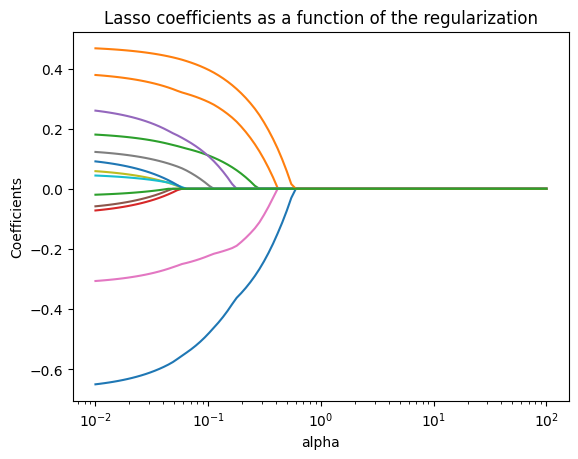

In [111]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [112]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.01


In [113]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
age                    -0.650306
sex                     0.378447
marital                 0.180229
veteran_ever           -0.072108
employ_last_week        0.259928
income_wage            -0.058303
ratio_fam_income_pov   -0.306716
ins_cov                 0.122519
bmi                     0.058619
urbanrural              0.044078
education               0.091084
lgbt                    0.467123
urban                  -0.019731
dtype: float64


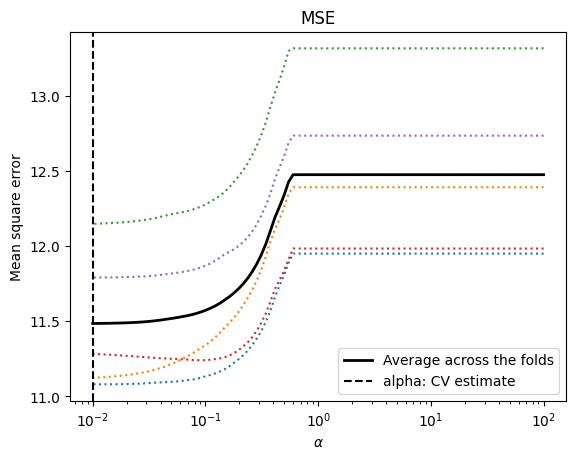

In [114]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [115]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred))
print(f"MSE is {mse}")

MSE is 12


### Bagging

In [116]:
from sklearn.ensemble import BaggingRegressor
# default estimator is decision tree
# n_estimator: The number of base estimators in the ensemble.
regr_bag = BaggingRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train) 

In [117]:
y_pred=regr_bag.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 14.485


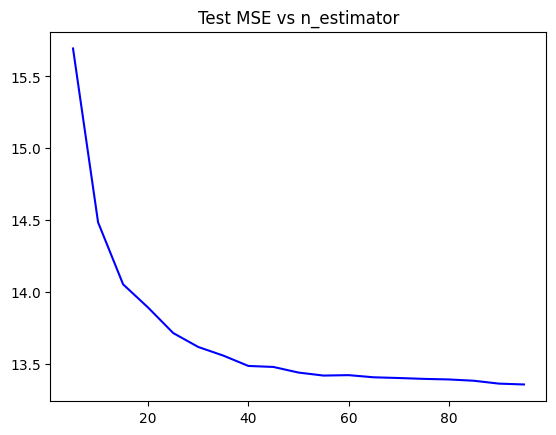

In [118]:
mse_list = []
n_list = np.arange(5,100,5)
for n in n_list:
    regr_bag = BaggingRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_bag.predict(scale(X_test.values))
    mse = round(mean_squared_error(y_test, y_pred),3)
    mse_list.append(mse)

plt.plot(n_list, mse_list,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

### Regression Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(max_depth=3)
model=regr_tree.fit(X_train,y_train)

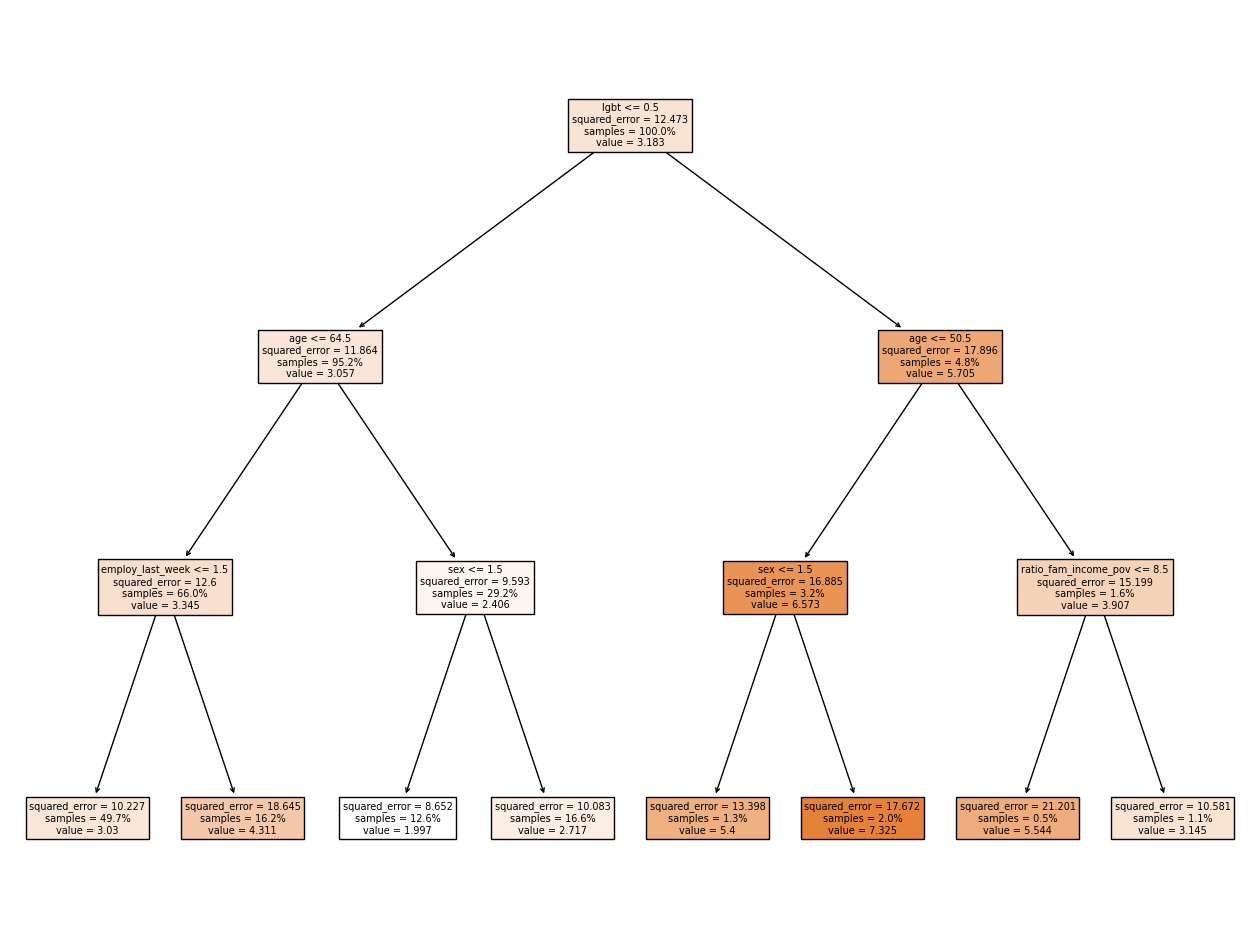

In [120]:
# Visualize classification tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train.columns) # specify feature names
plt.figure(figsize = (16,12))
plot_tree(regr_tree, feature_names = fn, filled = True, proportion=True);

In [121]:
y_pred=regr_tree.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 12.261


### Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [123]:
regr_RF = RandomForestRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train) 

In [124]:
y_pred=regr_RF.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 14.551


In [125]:
### Hyperparameter tuning for Random forest

In [126]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 16, 27, 38, 50, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5, 28, 52, 76, 100]}


In [127]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scale(X_train), y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 16, 27, 38, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 28, 52, 76, 100]},
                   random_state=42, verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 28,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 5,
 'bootstrap': True}

In [129]:
best_rd = rf_random.best_estimator_

In [130]:
y_pred=best_rd.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 11.525


##### The code is from Github. Try to check if you want to use, because I think the code parts above are easy to understand than this. For me, I run this one quite slowly and time consuming.

### Classification Task

In [131]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.simplefilter("ignore")

In [132]:
subset_df.head()

,anx_ever,dep_ever,anx_freq,anx_level,dep_freq,dep_level,age,sex,orient,marital,...,ratio_fam_income_pov,ins_cov,bmi,urbanrural,education,score,norm_score,mh_ever,lgbt,urban
0,0,0,0,0.0,0,0.0,50,1,2,3,...,7,2,3,4,1,0.0,-0.895675,False,0,False
1,0,0,1,1.5,0,0.0,53,1,2,3,...,12,2,3,4,2,1.5,-0.471833,True,0,False
2,1,0,3,1.5,1,1.0,56,1,2,3,...,14,2,3,4,2,5.5,0.658412,True,0,False
3,1,0,3,1.5,1,1.5,57,2,2,3,...,11,2,4,3,1,6.0,0.799693,True,0,True
4,0,0,0,0.0,0,0.0,41,1,2,1,...,14,2,3,1,1,0.0,-0.895675,False,0,True


In [133]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anx_ever              26925 non-null  int64  
 1   dep_ever              26925 non-null  int64  
 2   anx_freq              26925 non-null  int64  
 3   anx_level             26925 non-null  float64
 4   dep_freq              26925 non-null  int64  
 5   dep_level             26925 non-null  float64
 6   age                   26925 non-null  int64  
 7   sex                   26925 non-null  int64  
 8   orient                26925 non-null  int64  
 9   marital               26925 non-null  int64  
 10  veteran_ever          26925 non-null  int64  
 11  citizenship           26925 non-null  int64  
 12  school_current        26925 non-null  int64  
 13  employ_last_week      26925 non-null  int64  
 14  income_wage           26925 non-null  int64  
 15  income_account     

In [134]:
score_mean = subset_df['score'].mean()
score_mean

3.1698421541318478

In [135]:
# Define a function to map the values to mental_health_high or mental_health_low
def mental_health_map(score):
    if score >= score_mean:
        return 'mental_health_high'
    else:
        return 'mental_health_low'

In [136]:
# Apply the function to create the new mental_health column
subset_df['mental_health'] = subset_df['score'].apply(mental_health_map).astype('object')

In [137]:
subset_df['mental_health']

0         mental_health_low
1         mental_health_low
2        mental_health_high
3        mental_health_high
4         mental_health_low
                ...        
26920    mental_health_high
26921    mental_health_high
26922    mental_health_high
26923    mental_health_high
26924    mental_health_high
Name: mental_health, Length: 26925, dtype: object

In [138]:
clf = ['age', 'income_wage', 'ins_cov', 'urban', 'sex', 'education', 'bmi', 'marital', 'orient', 'employ_last_week', 'income_account', 'ratio_fam_income_pov', 'veteran_ever', 'mental_health']
y = subset_df['mental_health']
X = subset_df[clf]

In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   26925 non-null  int64 
 1   income_wage           26925 non-null  int64 
 2   ins_cov               26925 non-null  int64 
 3   urban                 26925 non-null  bool  
 4   sex                   26925 non-null  int64 
 5   education             26925 non-null  int64 
 6   bmi                   26925 non-null  int64 
 7   marital               26925 non-null  int64 
 8   orient                26925 non-null  int64 
 9   employ_last_week      26925 non-null  int64 
 10  income_account        26925 non-null  int64 
 11  ratio_fam_income_pov  26925 non-null  int64 
 12  veteran_ever          26925 non-null  int64 
 13  mental_health         26925 non-null  object
dtypes: bool(1), int64(12), object(1)
memory usage: 2.7+ MB


In [140]:
# Label Encode Categorical Features

#Create a label encoder object
le = LabelEncoder()
# Encode for all categorical features
le_count = 0
for col in X.columns: # -1 because the last column in this example is the target variable
    if X[col].dtype == 'bool':
        le.fit(X[col])
        X[col] = le.transform(X[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   26925 non-null  int64 
 1   income_wage           26925 non-null  int64 
 2   ins_cov               26925 non-null  int64 
 3   urban                 26925 non-null  int64 
 4   sex                   26925 non-null  int64 
 5   education             26925 non-null  int64 
 6   bmi                   26925 non-null  int64 
 7   marital               26925 non-null  int64 
 8   orient                26925 non-null  int64 
 9   employ_last_week      26925 non-null  int64 
 10  income_account        26925 non-null  int64 
 11  ratio_fam_income_pov  26925 non-null  int64 
 12  veteran_ever          26925 non-null  int64 
 13  mental_health         26925 non-null  object
dtypes: int64(13), object(1)
memory usage: 2.9+ MB


In [142]:
# Prepare for X and y
y = X.mental_health
X = X.drop('mental_health',axis=1)

# randomly split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70) # here we use 70% test data; feel free to change

In [143]:
y

0         mental_health_low
1         mental_health_low
2        mental_health_high
3        mental_health_high
4         mental_health_low
                ...        
26920    mental_health_high
26921    mental_health_high
26922    mental_health_high
26923    mental_health_high
26924    mental_health_high
Name: mental_health, Length: 26925, dtype: object

### Visualize classification tree

In [144]:
# fit classification tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 1, criterion="entropy")
dtc_model=dtc.fit(X_train,y_train)

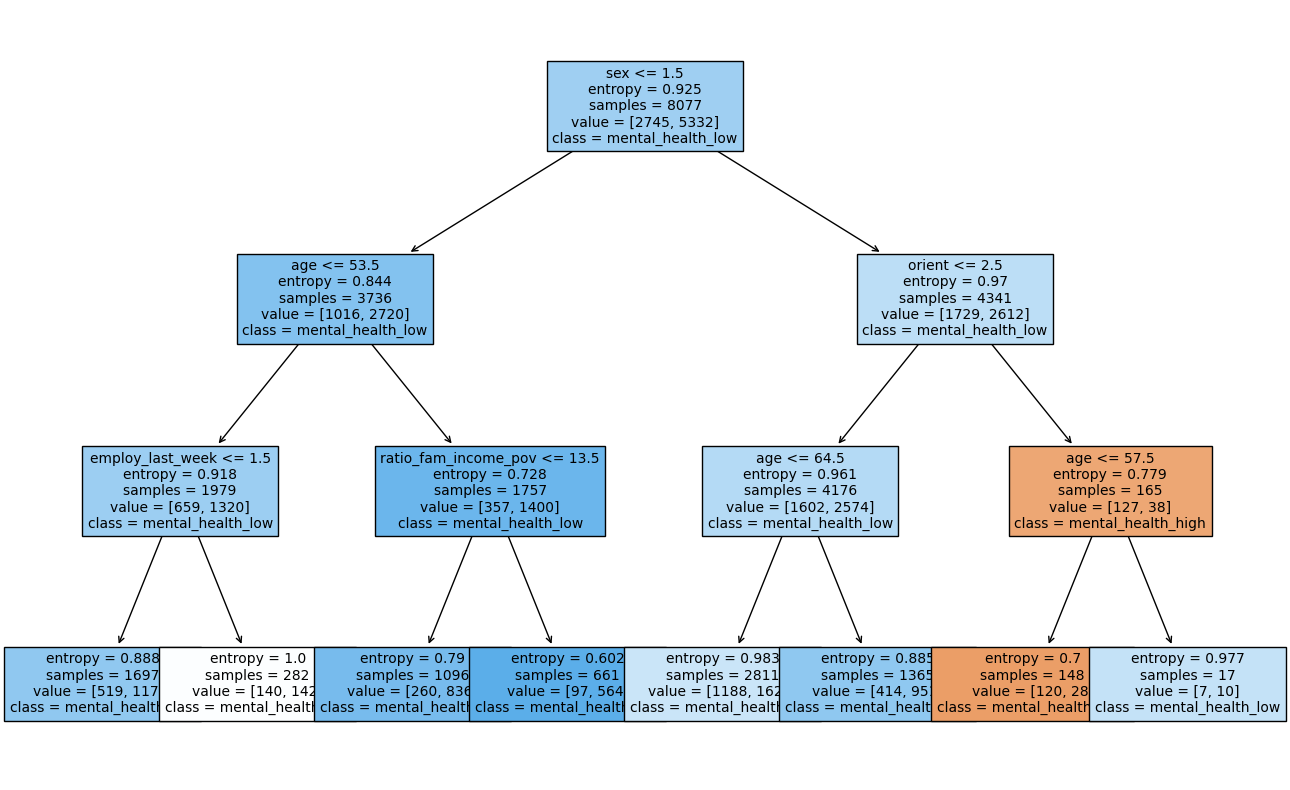

In [145]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
fn = X_test.columns.values
cn = y_test.unique()
plt.figure(figsize = (16,10))
plot_tree(dtc_model, feature_names = fn, class_names = cn, filled = True, fontsize=10);

### Plain accuracy

In [146]:
# evaluate in the test data
y_pred=dtc_model.predict(X_test)
print("Accuracy of Classification Tree: ",accuracy_score(y_test, y_pred))

Accuracy of Classification Tree:  0.6759337860780985


### Visualize the confusion matrix

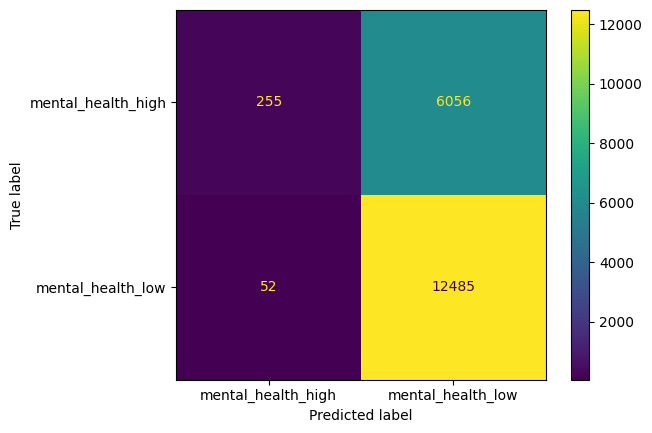

In [147]:
# Evaluate using the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()

### Plot ROC Curve

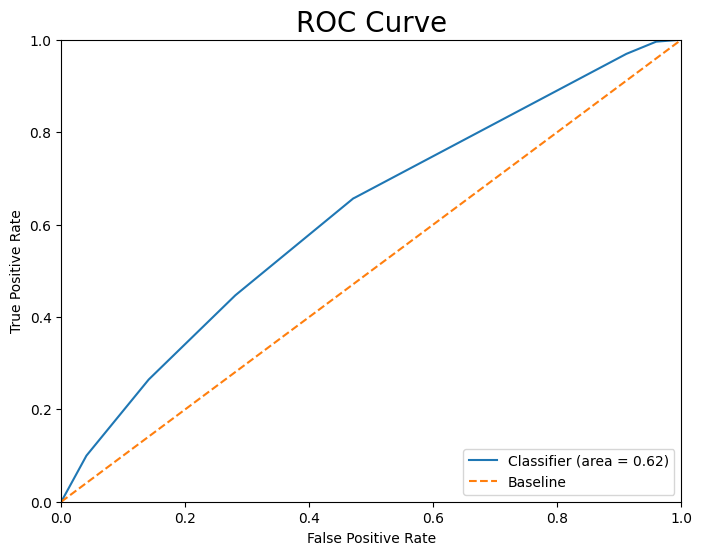

In [148]:
# Encoding target variables for ROC Curve Plot
# 0: LEAVE; 1: STAY
le.fit(y_test)
y_test=le.transform(y_test)
le.fit(y_train)
y_train=le.transform(y_train)

# Set the classifier
classifier = DecisionTreeClassifier(max_depth = 3, criterion="entropy")
classifier.fit(X_train, y_train)

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

### Compare Different Classifiers

In [149]:
# Initialize classifiers in consideration
models = []
models.append(('Logistic Regression', LogisticRegression()))
# models.append(('SVC', SVC(kernel = 'linear')))
# models.append(('Kernel SVM', SVC(kernel = 'rbf')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy')))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['AUC Mean'], ascending=False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,63.55,2.34,66.66,1.89
3,Random Forest,59.49,1.40,62.91,1.13
1,KNN,55.01,1.29,60.83,1.60
2,Decision Tree Classifier,53.91,2.56,57.89,1.83
